# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Firman Setiansyah
- **Email:** setiansyahfirman@gmail.com
- **ID Dicoding:** firmanidn

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana musim dapat mempengaruhi terhadap jumlah permintaan sewa sepeda?
- Pertanyaan 2 : Bagaimana waktu dapat mempengaruhi terhadap jumlah permintaan sewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [68]:
day_df = pd.read_csv("https://raw.githubusercontent.com/firman-idn/BikeSharing/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [69]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/firman-idn/BikeSharing/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day_df mencakup data harian untuk pemintaan sewa sepeda, sedangkan data set hour_df bisa dikatakan sebagai data pelengkap karena terdapat informasi waktu.
- Kedua dataset tersebut dapat digunakan untuk menganalisa trend permintaan sewa sepeda berdasarkan musim ataupun waktu.

### Assessing Data

In [70]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [71]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [72]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset day_df memilki 731 data entri dan 16 kolom
- Terdapat tipe data yang tidak sesuai pada kolom dteday
- Tidak terdapat data duplikasi pada dataset day_df
- Tidak terdapat missing value pada dataset day_df

In [73]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [74]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [75]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset hour_df memilki 17379 data entri dan 17 kolom
- Terdapat tipe data yang tidak sesuai pada kolom dteday
- Tidak terdapat data duplikasi pada dataset hour_df
- Tidak terdapat missing value pada dataset hour_df

### Cleaning Data

In [76]:
#Mengubah tipe data menjadi datetime
day_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [77]:
#Mengubah tipe data menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Tipe data yang tidak sesuai pada kolom dteday sudah diperbaiki menjadi tipe data datetime pada kedua dataset

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day_df

In [56]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2011-01-16 15:02:12.968536320,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-01-08 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2011-01-16 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2011-01-24 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2011-02-02 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [57]:
day_df.groupby(by=["yr", "season"])['cnt'].sum().reset_index()

,yr,season,cnt
0,0,1,150000
1,0,2,347316
2,0,3,419650
3,0,4,326137
4,1,1,321348
5,1,2,571273
6,1,3,641479
7,1,4,515476


**Insight:**
- Musim panas tahun 2012 memiliki jumlah permintaan sewa tertinggi

### Eksplorasi Data hour_df

In [58]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [59]:
hour_df.groupby(by=["weekday", "hr"])['cnt'].sum().reset_index()

,weekday,hr,cnt
0,0,0,9775
1,0,1,8053
2,0,2,6286
3,0,3,3239
4,0,4,955
...,...,...,...
163,6,19,24953
164,6,20,18810
165,6,21,16224
166,6,22,14525


**Insight:**
- Hari selasa jam 17 (jam 5 sore) memiliki jumlah permintaan sewa tertinggi pada hari kerja
- Hari sabtu jam 13 (1 siang) memiliki jumlah permintaan sewa tertinggi pada akhir pekan

### Eksplorasi Data day_df dan hour_df

In [60]:
rent_bike_df = pd.merge(
    left=hour_df,
    right=day_df,
    how="left"
)
rent_bike_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [61]:
# Mengubah nilai menjadi tahun
rent_bike_df['yr'] = rent_bike_df['yr'].replace({0: 2011, 1: 2012})

# Mengubah nilai menjadi nama hari
weekday= {
    0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'
}
rent_bike_df['weekday'] = rent_bike_df['weekday'].map(weekday)

# Mengubah nilai menjadi nama musim
season= {
    1: 'Dingin', 2: 'Semi', 3: 'Panas', 4: 'Gugur'
}
rent_bike_df['season'] = rent_bike_df['season'].map(season)

In [62]:
rent_bike_df.groupby(by=["yr", "season", "weekday", "hr"])['cnt'].sum().reset_index()

,yr,season,weekday,hr,cnt
0,2011,Dingin,Jumat,0,215
1,2011,Dingin,Jumat,1,113
2,2011,Dingin,Jumat,2,66
3,2011,Dingin,Jumat,3,32
4,2011,Dingin,Jumat,4,8
...,...,...,...,...,...
1339,2012,Semi,Senin,19,6061
1340,2012,Semi,Senin,20,4095
1341,2012,Semi,Senin,21,2908
1342,2012,Semi,Senin,22,1858


**Insight:**
- Terdapat 1344 data entri saat dikelompokkan berdasarkan tahun, musim, hari, dan jam untuk memberikan gambaran atas pertanyaan pengaruh musim dan waktu terhadap jumlah permintaan sewa.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana musim dapat mempengaruhi terhadap jumlah permintaan sewa sepeda?

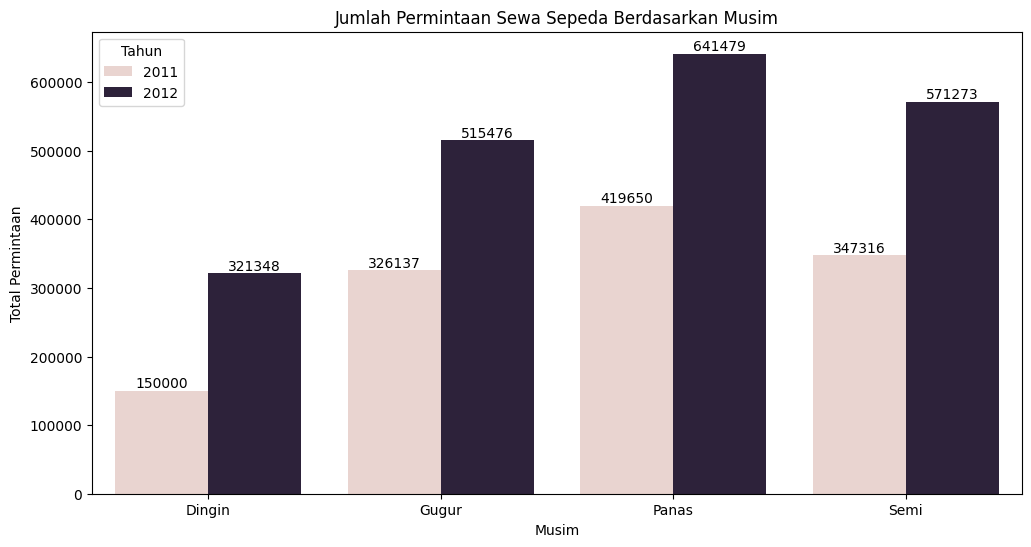

In [63]:
total_rent_based_season = rent_bike_df.groupby(['season', 'yr'])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))

barplot_index = sns.barplot(data=total_rent_based_season, x="season", y="cnt", hue="yr")

for p in barplot_index.patches:
    height = p.get_height()
    if height > 0:
      plt.annotate(f'{int(height)}',
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center',
                 va='bottom')

plt.title('Jumlah Permintaan Sewa Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Permintaan')
plt.legend(title='Tahun', loc='upper left')
plt.show()

**Insight:**
- Musim panas memiliki jumlah permintaan sewa tertinggi
- Musim semi dan gugur memiliki jumlah permintaan sewa yang identik
- Musim dingin memiliki jumlah permintaan sewa terendah

### Pertanyaan 2 : Bagaimana waktu dapat mempengaruhi terhadap jumlah permintaan sewa sepeda?

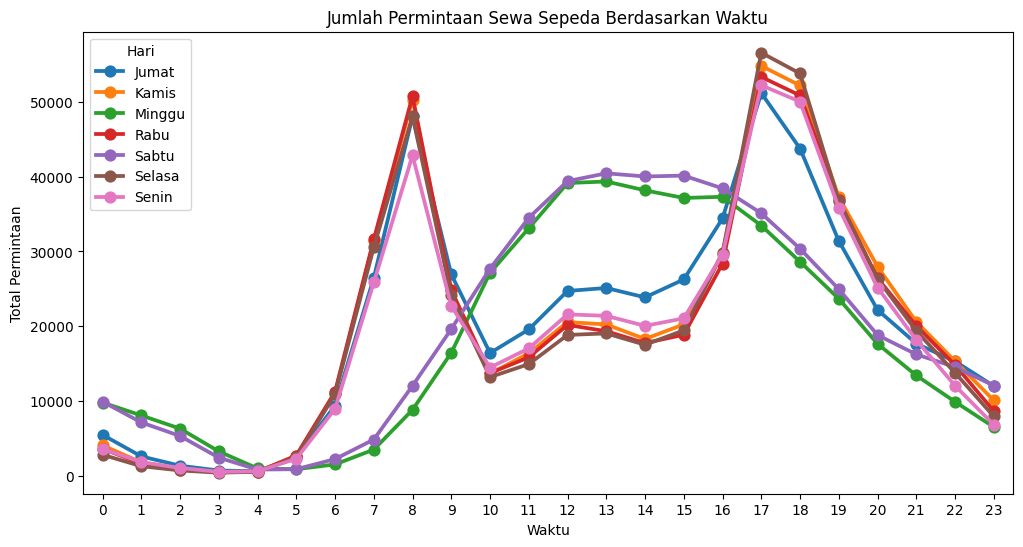

In [64]:
total_rent_based_time = rent_bike_df.groupby(['hr', 'weekday'])['cnt'].sum().reset_index()

plt.figure(figsize=(12, 6))

sns.pointplot(data=total_rent_based_time, x='hr', y='cnt', hue='weekday')

plt.title('Jumlah Permintaan Sewa Sepeda Berdasarkan Waktu')
plt.xlabel('Waktu')
plt.ylabel('Total Permintaan')
plt.legend(title='Hari', loc='upper left')
plt.show()

**Insight:**
- Saat hari kerja (senin - jumat), ada pola permintaan yang meningkat di jam sibuk yang dipengaruhi oleh orang-orang ingin menuju ke tempat tujuan, seperti berangkat dan pulang kerja maupun sekolah
- Saat akhir pekan (sabtu - minggu), ada pola permintaan yang meningkat pada pagi hingga sore yang dipengaruhi oleh orang-orang ingin beraktivitas santai ke taman atau tempat wisata

## Analisis Lanjutan (Opsional)

In [65]:
rent_bike_df.groupby(by=["yr", "season"]).agg({
    "casual": "sum" ,
    "registered": "sum",
    "cnt": "sum"
}).reset_index()

,yr,season,casual,registered,cnt
0,2011,Dingin,21425,128575,150000
1,2011,Gugur,52813,273324,326137
2,2011,Panas,95450,324200,419650
3,2011,Semi,77564,269752,347316
4,2012,Dingin,39197,282151,321348
5,2012,Gugur,76969,438507,515476
6,2012,Panas,130641,510838,641479
7,2012,Semi,125958,445315,571273


## Conclusion

- Conclution pertanyaan 1

Berdasarkan analisa, musim panas merupakan musim yang terbaik dikarenakan adanya permintaan sewa yang cenderung meningkat. Sedangkan, musim semi dan gugur, jumlah permintaan sewanya cenderung identik.

Untuk penyedia penyewaan sepeda dapat melakukan pengaturan promosi untuk target pengguna kasual maupun potensial, misal rekomendasi destinasi wisata terbaik bagi pengguna sepeda di musim panas atau musim lainnya yang masih memiliki potensial untuk bertumbuh, seperti musim semi dan gugur.

- Conclution pertanyaan 2

Berdasarkan analisa, ada permintaan sewa yang cenderung meningkat pada waktu sibuk saat orang-orang ingin pergi ke tempat tujuan, seperti berangkat dan pulang kerja maupun sekolah pada hari kerja, dan pada pagi hingga sore saat beraktivitas santai ke taman atau tempat wisata pada akhir pekan dikarenakan adanya permintaan sewa yang cenderung meningkat.

Untuk penyedia penyewaan sepeda dapat mempertimbangkan untuk menambah armada sepeda di lokasi yang strategis, seperti area tempat tinggal, transit kendaraan umum, perkantoran atau sekolah saat hari kerja dan area taman atau tempat wisata saat akhir pekan.

In [66]:
rent_bike_df.to_csv("main_data.csv", index=False)